# 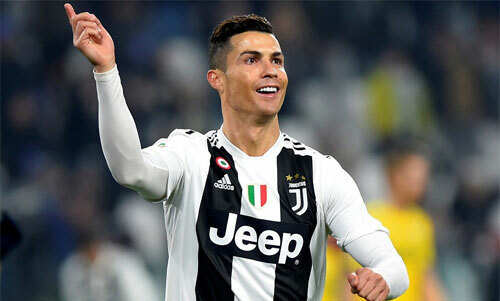
**Ảnh dùng để nén**

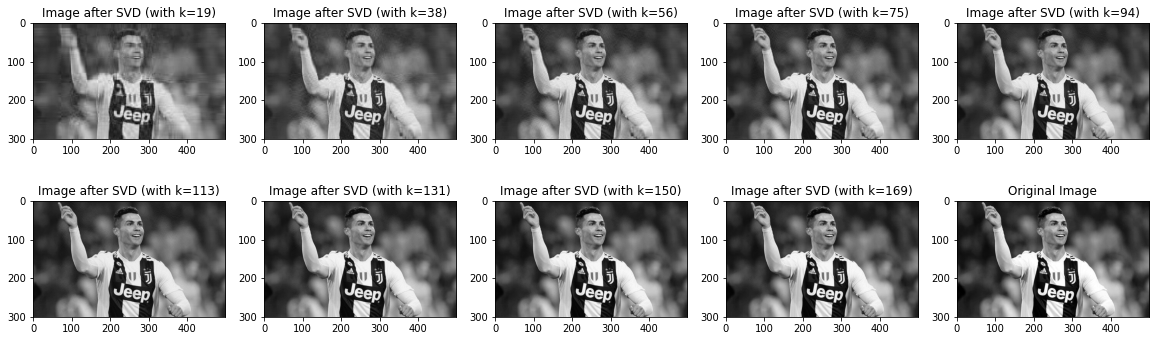

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
im1 = Image.open('/content/ronaldo1.bmp')
im = cv2.imread('/content/ronaldo1.bmp')
#Cách chuyển ảnh màu sang ảnh xám có thể dùng 1 trong 2 cách :
# ig = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY )
ig = (im[:,:,2]*0.3+im[:,:,1]*0.59+im[:,:,0]*0.11).astype('int32')
width, height = im1.size
x = (width*height)/(width+height+1)
row = 2
column = 5
fig = plt.figure(figsize=[20, 6])
def SVD_pic(k, a):
    U, S, V =np.linalg.svd(ig, full_matrices= True)
    U1 = U[:,:k]
    S1 = np.diag(S)[:k,:k]
    V1 = V[:k,:]
    #Lưu U1*, S1*, V1* xuống file
    np.save('/content/U*.npy', U1, allow_pickle=True)
    np.save('/content/S*.npy', S1, allow_pickle=True)
    np.save('/content/V*.npy', V1, allow_pickle=True)
    #Load U1*, S1*, V1* từ file
    U1 = np.load('/content/U*.npy')
    S1 = np.load('/content/S*.npy')
    V1 = np.load('/content/V*.npy')
    #Khôi phục ảnh I1
    I1 = np.dot(np.dot(U1, S1), V1).astype('int32')      
    ax = fig.add_subplot(row, column, a)
    plt.imshow(I1, cmap='gray')
    ax.title.set_text(f'Image after SVD (with k={k})')
#H = [x/10, x/5, 3*x/10, 2*x/5, x/2, 3*x/5, 7*x/10, 4*x/5, 9*x/10]
S = 0
ax1 = fig.add_subplot(row, column, 10)
plt.imshow(ig, cmap='gray')
ax1.title.set_text('Original Image')
for i in range(0, 9):
  #k = round(H[i])
  S = S + x*0.1
  k = round(S)
  a = i+1
  SVD_pic(k, a)
plt.show()